# Разведочный анализ данных (РАД) | Exploratory Data Analysis (EDA)

## Задание

1.   Выбрать какой-нибудь набор открытых данных
  - соревнования по машинному обучению (kaggle)
2. Загрузить и проверить формат файла
3. Прочитать данные в DataFrame
4. Запустить профилирование данных
5. Нужна ли очистка данных или дополнительная переработка какого-нибудь признака?
6. Повторное профилирование после очистки, видно ли что-нибудь новое?


## 1. Выбрать набор открытых данных (kaggle)

In [ ]:
!pip install -q kaggle

kaggle token.json

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maxkkov","key":"b33e46083bf2bb7db682d8a3f52ee1fe"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d asahu40/walmart-data-analysis-and-forcasting

  0% 0.00/122k [00:00<?, ?B/s]
100% 122k/122k [00:00<00:00, 72.1MB/s]


In [ ]:
!unzip walmart-data-analysis-and-forcasting.zip

Archive:  walmart-data-analysis-and-forcasting.zip
  inflating: Walmart Data Analysis and Forcasting.csv  


## 2. Загрузить и проверить формат файла

In [ ]:
!pwd # Текущая директория

/content


In [ ]:
!cd /content

In [ ]:
!ls

 kaggle.json  'Walmart Data Analysis and Forcasting.csv'
 sample_data   walmart-data-analysis-and-forcasting.zip


In [ ]:
!ls -lh

total 488K
-rw-r--r-- 1 root root   63 May  2 15:49  kaggle.json
drwxr-xr-x 1 root root 4.0K Apr 28 13:35  sample_data
-rw-r--r-- 1 root root 356K Apr 26 07:07 'Walmart Data Analysis and Forcasting.csv'
-rw-r--r-- 1 root root 123K May  2 15:49  walmart-data-analysis-and-forcasting.zip


In [ ]:
# минимальный анализ формата файла исходя из содержимого
!file *

kaggle.json:                              JSON data
sample_data:                              directory
Walmart Data Analysis and Forcasting.csv: CSV text
walmart-data-analysis-and-forcasting.zip: Zip archive data, at least v4.5 to extract


In [ ]:
# размер в строках, словах и символах
!wc *

      0       1      63 kaggle.json
wc: sample_data: Is a directory
      0       0       0 sample_data
   6436    6436  363734 Walmart Data Analysis and Forcasting.csv
    478    2524  125153 walmart-data-analysis-and-forcasting.zip
   6914    8961  488950 total


In [ ]:
# Начало и конец файла
!head -n 5 'Walmart Data Analysis and Forcasting.csv'
!echo ...
!tail -n 5 'Walmart Data Analysis and Forcasting.csv'

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,05-02-2010,1643690.9,0,42.31,2.572,211.0963582,8.106
1,12-02-2010,1641957.44,1,38.51,2.548,211.2421698,8.106
1,19-02-2010,1611968.17,0,39.93,2.514,211.2891429,8.106
1,26-02-2010,1409727.59,0,46.63,2.561,211.3196429,8.106
...
45,28-09-2012,713173.95,0,64.88,3.997,192.0135577,8.684
45,05-10-2012,733455.07,0,64.89,3.985,192.1704115,8.667
45,12-10-2012,734464.36,0,54.47,4,192.3272654,8.667
45,19-10-2012,718125.53,0,56.47,3.969,192.3308542,8.667
45,26-10-2012,760281.43,0,58.85,3.882,192.3088989,8.667


In [ ]:
# Названия столбцов из переписи
!head -n1 'Walmart Data Analysis and Forcasting.csv'

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


## 3. Прочитать данные в DataFrame (pandas python)

In [ ]:
import pandas as pd

In [ ]:
w_df = pd.read_csv('Walmart Data Analysis and Forcasting.csv')
w_df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [ ]:
w_df.rename(columns={'Holiday_Flag':'IsHoliday'},inplace=True) # rename the column
w_df['IsHoliday'] = w_df['IsHoliday'].astype(bool)
w_df['Date'] = pd.to_datetime(w_df['Date'])

<ipython-input-18-9305a4d2f89c>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  w_df['Date'] = pd.to_datetime(w_df['Date'])


In [ ]:
from sklearn.model_selection import train_test_split

w_df_train, w_df_test = train_test_split(w_df, test_size=0.3, random_state=42)

print(f"Training examples: {w_df_train.shape[0]}")
print(f"Testing examples: {w_df_test.shape[0]}")

Training examples: 4504
Testing examples: 1931


In [ ]:
for x in w_df:
  print(x)

Store
Date
Weekly_Sales
IsHoliday
Temperature
Fuel_Price
CPI
Unemployment


## 4. Запустить профилирование данных

In [ ]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   IsHoliday     6435 non-null   bool          
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 358.3 KB


In [ ]:
w_df.shape

(6435, 8)

In [ ]:
w_df.describe().T #transpose

count          mean            std         min         25%  \
Store         6435.0  2.300000e+01      12.988182       1.000      12.000   
Weekly_Sales  6435.0  1.046965e+06  564366.622054  209986.250  553350.105   
Temperature   6435.0  6.066378e+01      18.444933      -2.060      47.460   
Fuel_Price    6435.0  3.358607e+00       0.459020       2.472       2.933   
CPI           6435.0  1.715784e+02      39.356712     126.064     131.735   
Unemployment  6435.0  7.999151e+00       1.875885       3.879       6.891   

                        50%           75%           max  
Store             23.000000  3.400000e+01  4.500000e+01  
Weekly_Sales  960746.040000  1.420159e+06  3.818686e+06  
Temperature       62.670000  7.494000e+01  1.001400e+02  
Fuel_Price         3.445000  3.735000e+00  4.468000e+00  
CPI              182.616521  2.127433e+02  2.272328e+02  
Unemployment       7.874000  8.622000e+00  1.431300e+01

### ydata-profiling (pandas-profiling)

In [ ]:
!pip list | grep profiling

In [ ]:
!pip install 'ydata-profiling'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=ee24b59fe981908a261b7456031afa3b8c971dada5e0bcb64dfcd585950d75b2
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cec

In [ ]:
from ydata_profiling import ProfileReport
ProfileReport(w_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 5. Нужна ли очистка данных или дополнительная переработка какого-нибудь признака?

### Пустые значения

In [ ]:
w_df.info() # пустых значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   IsHoliday     6435 non-null   bool          
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 358.3 KB


In [ ]:
w_df.isnull().any().any()

False

### Дораспознание признаков (выполняется ранее)

In [ ]:
# w_df['IsHoliday'] = w_df['IsHoliday'].astype(bool)
# w_df['Date'] = pd.to_datetime(w_df['Date'])

### Повторяющаяся информация и проверка своих ожиданий

In [ ]:
print(w_df["Store"].nunique(), "|",
      w_df["Date"].nunique(), "|",
      w_df["Weekly_Sales"].nunique(), "|",
      w_df["IsHoliday"].nunique(), "|",
      w_df["Temperature"].nunique(), "|",
      w_df["Fuel_Price"].nunique(), "|",
      w_df["CPI"].nunique(), "|",
      w_df["Unemployment"].nunique())

45 | 143 | 6435 | 2 | 3528 | 892 | 2145 | 349


## 6. Визуализация
В profile report видно не все интересные закономерности, но данные pandas удобно визуализировать любым нужным вам способом

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
plot_w_df = w_df

In [ ]:
plot_w_df = plot_w_df.drop("Store", axis=1)
plot_w_df = plot_w_df.drop("Date", axis=1)
plot_w_df = plot_w_df.drop("Weekly_Sales", axis=1)
plot_w_df = plot_w_df.drop("IsHoliday", axis=1)
plot_w_df = plot_w_df.drop("Temperature", axis=1)
plot_w_df = plot_w_df.drop("Fuel_Price", axis=1)
#plot_w_df = plot_w_df.drop("CPI", axis=1)
#plot_w_df = plot_w_df.drop("Unemployment", axis=1)

<Axes: >

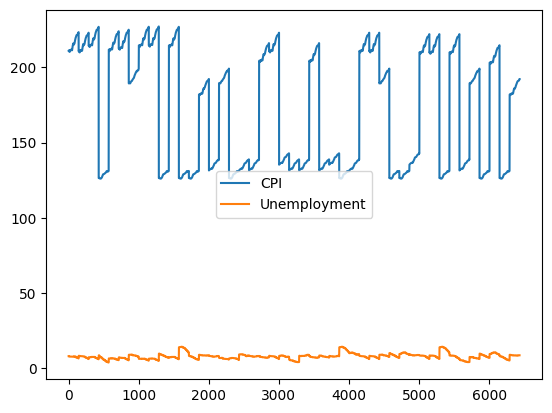

In [ ]:
plot_w_df.plot()

# Advanced

## Stores on week

Cредние еженедельные продажи для каждого магазина (45) в будни и выходные

In [ ]:
store_holiday_table = pd.pivot_table(w_df, index='Store', columns='IsHoliday',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_holiday_table)

IsHoliday         False        True 
Store                               
1          1.546957e+06  1665747.656
2          1.914209e+06  2079266.900
3          4.000648e+05   437811.050
4          2.083556e+06  2243102.624
5          3.148923e+05   359501.607
6          1.555993e+06  1680907.927
7          5.629645e+05   672400.265
8          9.037434e+05   975330.860
9          5.405993e+05   588950.821
10         1.883309e+06  2113755.949
11         1.349465e+06  1448394.485
12         9.992919e+05  1138140.420
13         1.995393e+06  2113043.806
14         2.013489e+06  2120582.998
15         6.170648e+05   706406.018
16         5.156774e+05   566733.646
17         8.870990e+05   979796.971
18         1.078350e+06  1169422.161
19         1.435071e+06  1577046.734
20         2.097048e+06  2249035.081
21         7.507742e+05   826491.309
22         1.024262e+06  1084874.656
23         1.384400e+06  1462542.294
24         1.347857e+06  1475098.251
25         7.042437e+05   739676.842
26         9.977137e+05  1072046.849
27         1.766413e+06  1892299.278
28         1.311889e+06  1478244.605
29         5.343758e+05   606957.889
30         4.387090e+05   436859.307
31         1.388073e+06  1500026.030
32         1.163770e+06  1203784.083
33         2.596562e+05   262594.519
34         9.611277e+05  1041978.089
35         9.080992e+05  1074348.457
36         3.739534e+05   367640.630
37         5.197556e+05   507525.050
38         3.860491e+05   381509.878
39         1.443115e+06  1551127.480
40         9.608268e+05  1008034.075
41         1.263101e+06  1334947.856
42         5.555550e+05   567694.158
43         6.331276e+05   635946.278
44         3.032536e+05   296035.601
45         7.821985e+05   836293.713

Для избежания некорректных значений отрежим значения продаж менее 0

In [ ]:
w_df = w_df.loc[w_df['Weekly_Sales'] > 0]
w_df

Store       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90      False        42.31       2.572   
1         1 2010-12-02    1641957.44       True        38.51       2.548   
2         1 2010-02-19    1611968.17      False        39.93       2.514   
3         1 2010-02-26    1409727.59      False        46.63       2.561   
4         1 2010-05-03    1554806.68      False        46.50       2.625   
...     ...        ...           ...        ...          ...         ...   
6430     45 2012-09-28     713173.95      False        64.88       3.997   
6431     45 2012-05-10     733455.07      False        64.89       3.985   
6432     45 2012-12-10     734464.36      False        54.47       4.000   
6433     45 2012-10-19     718125.53      False        56.47       3.969   
6434     45 2012-10-26     760281.43      False        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [ ]:
w_df.shape

(6435, 8)

## Date

In [ ]:
w_df['Date'].head(5).append(w_df['Date'].tail(5)) # first and last 5 rows.

<ipython-input-38-24a899bfb307>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w_df['Date'].head(5).append(w_df['Date'].tail(5)) # first and last 5 rows.


0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, dtype: datetime64[ns]

Данные с 5 февраля 2010 по 26 октября 2012

## Holiday

In [ ]:
import seaborn as sns

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

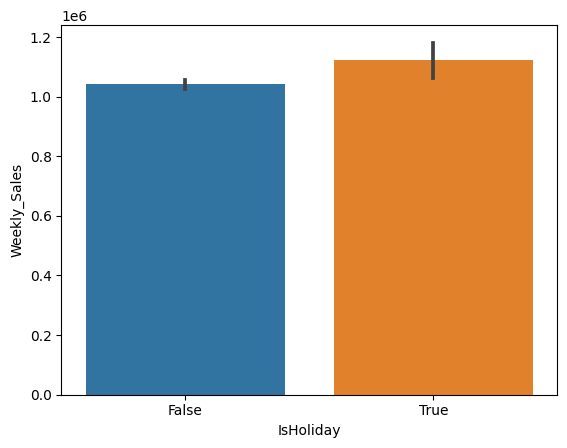

In [ ]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=w_df)

Уникальные даты выходных (избранные выходные)

In [ ]:
w_df[w_df["IsHoliday"] == True]['Date'].unique()

array(['2010-12-02T00:00:00.000000000', '2010-10-09T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-11-02T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-10-02T00:00:00.000000000', '2012-07-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

количество записей не выходных

In [ ]:
w_df[w_df["IsHoliday"] != True]['Date'].nunique()

133

### Посмотрим различия между праздниками

In [ ]:
w_df.loc[(w_df['Date'] == '2010-12-02T00:00:00.000000000')|(w_df['Date'] == '2010-12-31T00:00:00.000000000')|(w_df['Date'] == '2011-12-30T00:00:00.000000000'),'December'] = True
w_df.loc[(w_df['Date'] != '2010-12-02T00:00:00.000000000')&(w_df['Date'] != '2010-12-31T00:00:00.000000000')&(w_df['Date'] != '2011-12-30T00:00:00.000000000'),'December'] = False

w_df.loc[(w_df['Date'] == '2010-11-26T00:00:00.000000000')|(w_df['Date'] == '2011-11-02T00:00:00.000000000')|(w_df['Date'] == '2011-11-25T00:00:00.000000000'),'November'] = True
w_df.loc[(w_df['Date'] != '2010-11-26T00:00:00.000000000')&(w_df['Date'] != '2011-11-02T00:00:00.000000000')&(w_df['Date'] != '2011-11-25T00:00:00.000000000'),'November'] = False

w_df.loc[(w_df['Date'] == '2012-10-02T00:00:00.000000000')|(w_df['Date'] == '2010-10-09T00:00:00.000000000'),'October'] = True
w_df.loc[(w_df['Date'] != '2012-10-02T00:00:00.000000000')&(w_df['Date'] != '2010-10-09T00:00:00.000000000'),'October'] = False

w_df.loc[(w_df['Date'] == '2011-09-09T00:00:00.000000000')|(w_df['Date'] == '2012-07-09T00:00:00.000000000'),'Julember'] = True
w_df.loc[(w_df['Date'] != '2011-09-09T00:00:00.000000000')&(w_df['Date'] != '2012-07-09T00:00:00.000000000'),'Julember'] = False

<Axes: xlabel='December', ylabel='Weekly_Sales'>

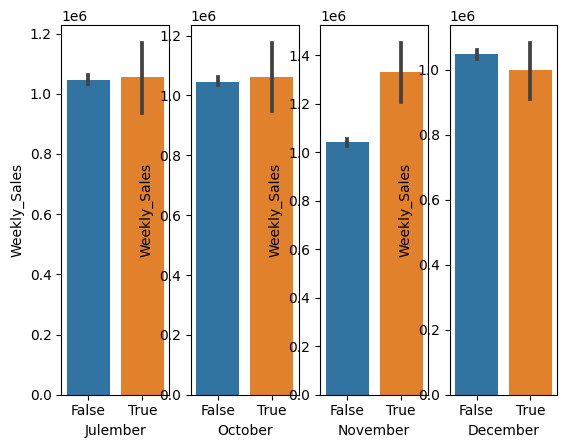

In [ ]:
fig, axs = plt.subplots(ncols=4)

sns.barplot(x='Julember', y='Weekly_Sales', data=w_df, ax = axs[0]) 
sns.barplot(x='October', y='Weekly_Sales', data=w_df, ax = axs[1])
sns.barplot(x='November', y='Weekly_Sales', data=w_df, ax = axs[2])
sns.barplot(x='December', y='Weekly_Sales', data=w_df, ax = axs[3]) 

## Holiday effect on Stores

In [ ]:
w_df.groupby(['November'])['Weekly_Sales'].mean()  # Avg weekly sales for Stores in November

November
False    1.040868e+06
True     1.331487e+06
Name: Weekly_Sales, dtype: float64

Проценты для каждого магазина

In [ ]:
import matplotlib as mpl

In [ ]:
w_df.nlargest(5, 'Weekly_Sales')

Store       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
1905     14 2010-12-24    3818686.45      False        30.59       3.141   
2763     20 2010-12-24    3766687.43      False        25.17       3.141   
1333     10 2010-12-24    3749057.69      False        57.06       3.236   
527       4 2011-12-23    3676388.98      False        35.92       3.103   
1762     13 2010-12-24    3595903.20      False        34.90       2.846   

             CPI  Unemployment December November October Julember  
1905  182.544590         8.724    False    False   False    False  
2763  204.637673         7.484    False    False   False    False  
1333  126.983581         9.003    False    False   False    False  
527   129.984548         5.143    False    False   False    False  
1762  126.983581         7.795    False    False   False    False

In [ ]:
Total = w_df['Weekly_Sales'].sum()
Total

6737218987.11

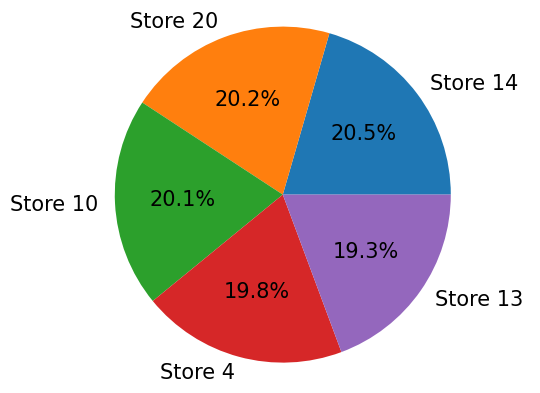

In [ ]:
my_data = [3818686.45/Total, 3766687.43/Total, 3749057.69/Total, 3676388.98/Total, 3595903.20/Total  ]  #percentages
my_labels = 'Store 14','Store 20', 'Store 10', 'Store 4', 'Store 13' # labels
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) #plot pie type and bigger the labels
plt.axis('equal')
mpl.rcParams.update({'font.size': 20}) #bigger percentage labels

plt.show()

In [ ]:
w_df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    1.041256e+06
True     1.122888e+06
Name: Weekly_Sales, dtype: float64

## Статистика

In [ ]:
w_df['week'] =w_df['Date'].dt.week
w_df['month'] =w_df['Date'].dt.month 
w_df['year'] =w_df['Date'].dt.year

<ipython-input-75-a2421435e53b>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  w_df['week'] =w_df['Date'].dt.week


In [ ]:
w_df.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales

month
1     9.476139e+05
2     1.054597e+06
3     1.024975e+06
4     1.024324e+06
5     1.035379e+06
6     1.064848e+06
7     1.014212e+06
8     1.044874e+06
9     1.009457e+06
10    1.030631e+06
11    1.133751e+06
12    1.210255e+06
Name: Weekly_Sales, dtype: float64

In [ ]:
w_df.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales

year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='month'>

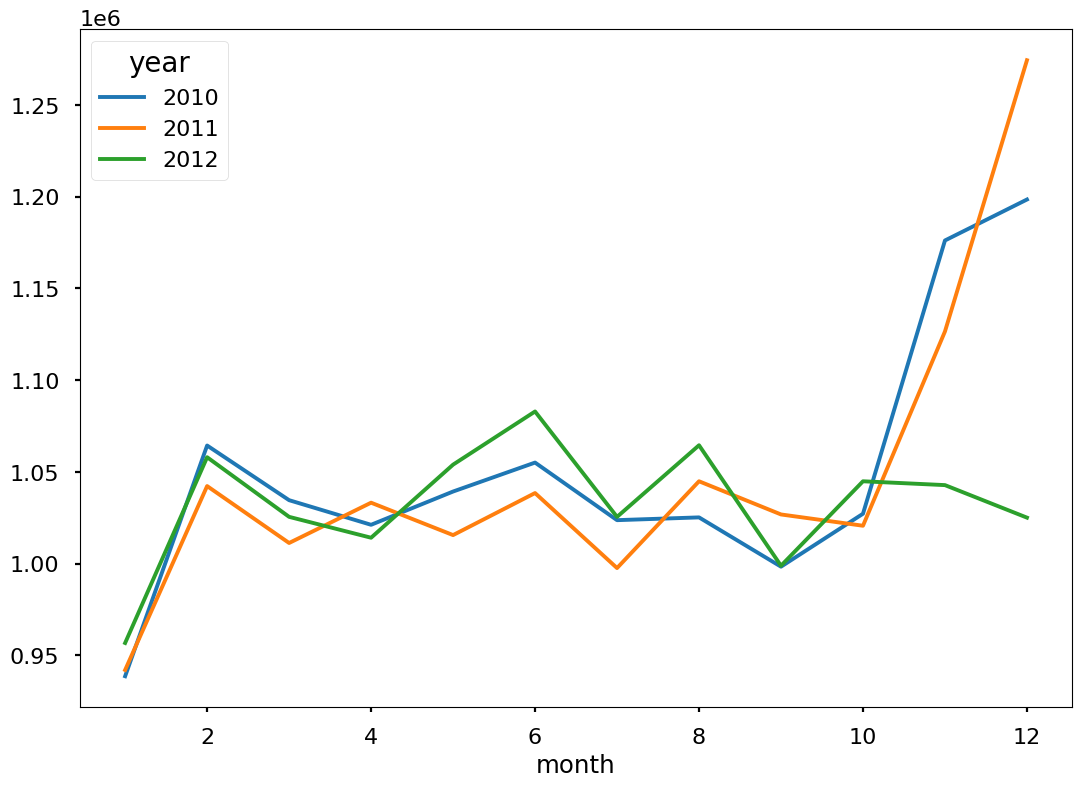

In [ ]:
monthly_sales = pd.pivot_table(w_df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

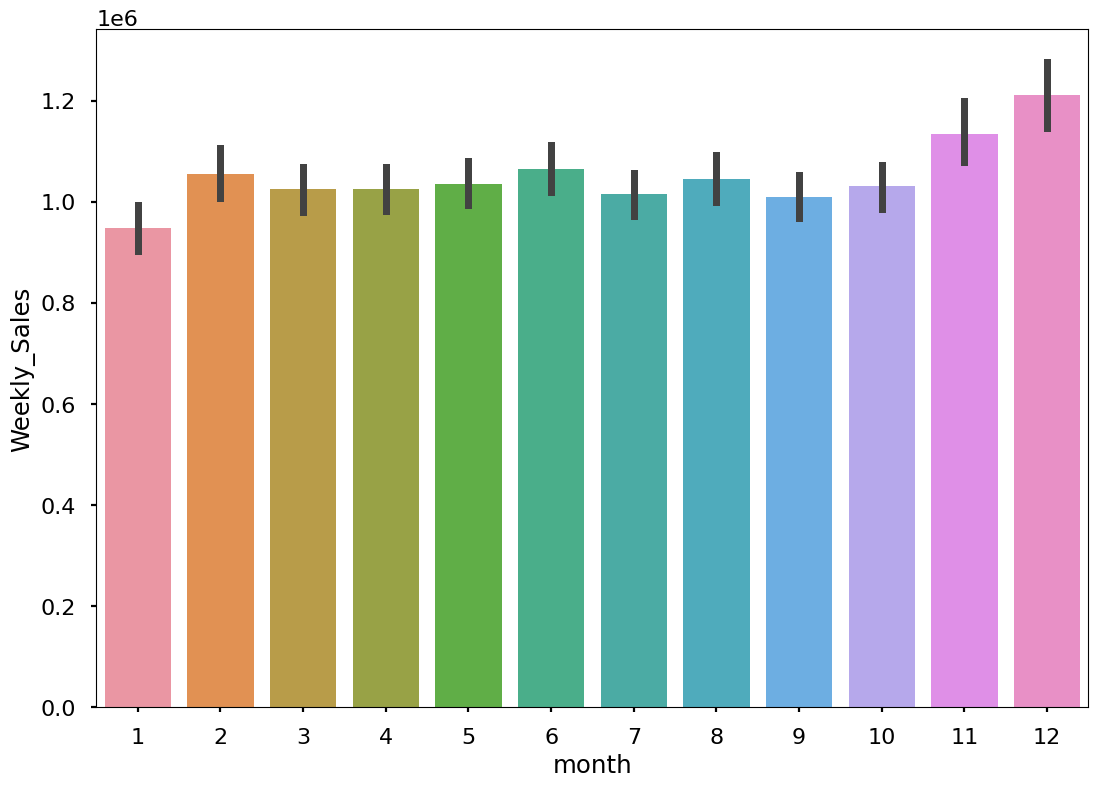

In [ ]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=w_df)

In [ ]:
w_df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    1.754774e+06
47    1.471273e+06
50    1.244704e+06
23    1.133040e+06
7     1.090298e+06
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='week'>

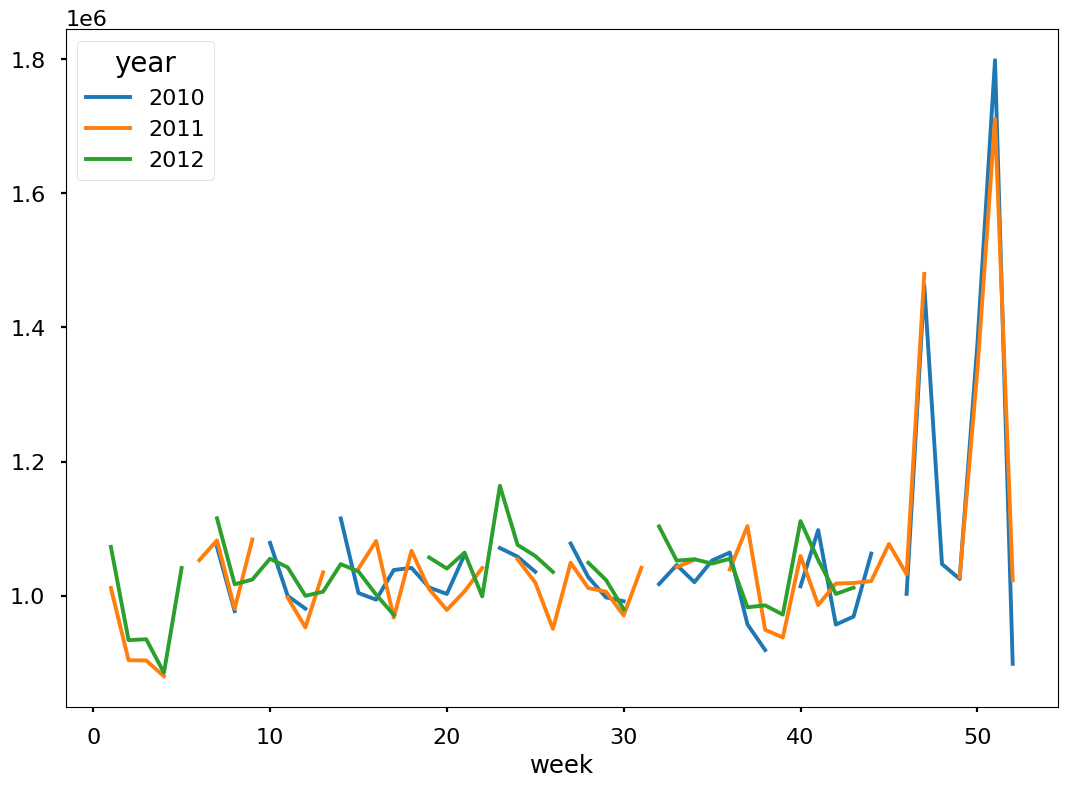

In [ ]:
weekly_sales = pd.pivot_table(w_df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

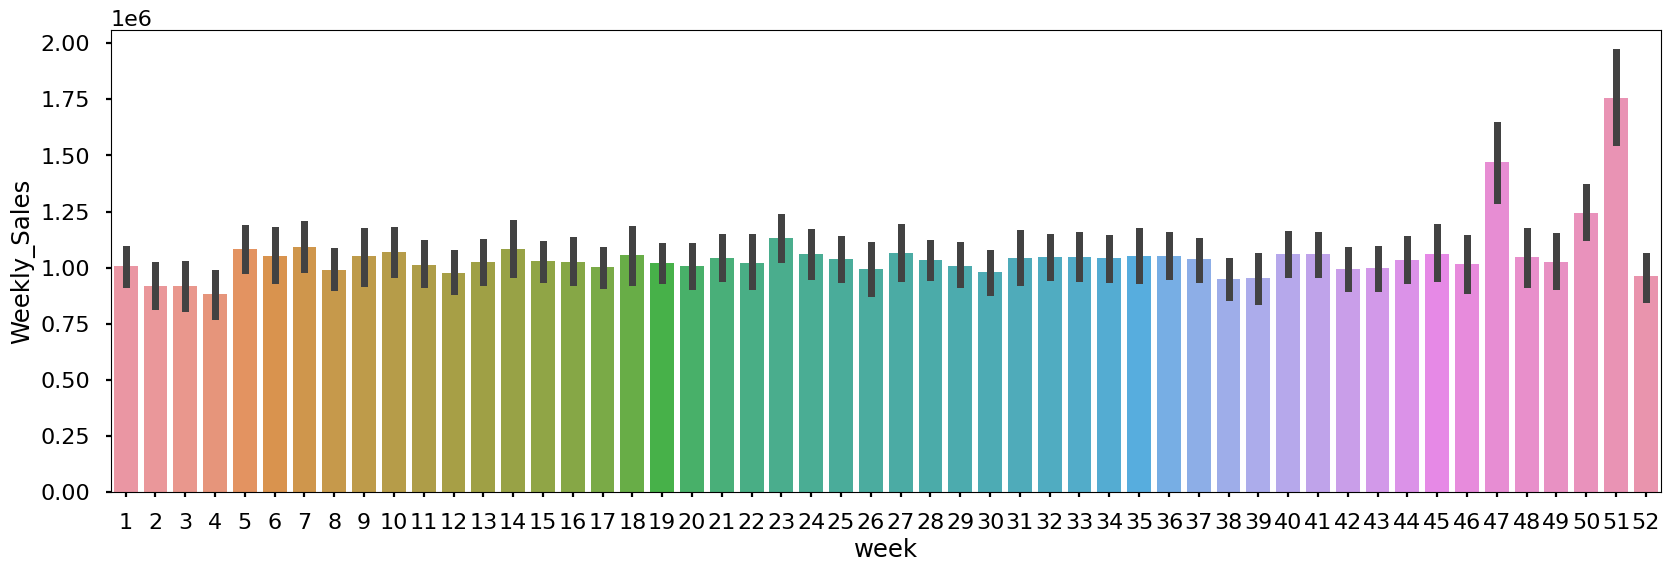

In [ ]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=w_df)

### Fuel Price, CPI , Unemployment , Temperature Effects

<Axes: xlabel='Fuel_Price'>

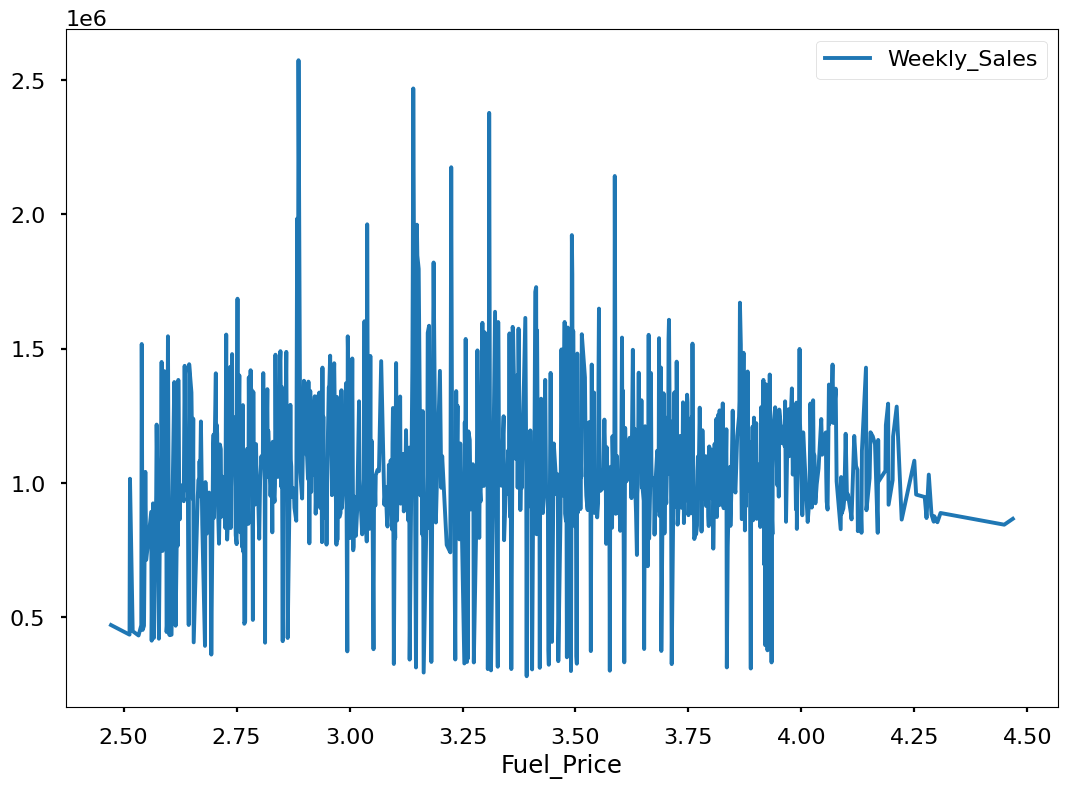

In [ ]:
fuel_price = pd.pivot_table(w_df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<Axes: xlabel='Temperature'>

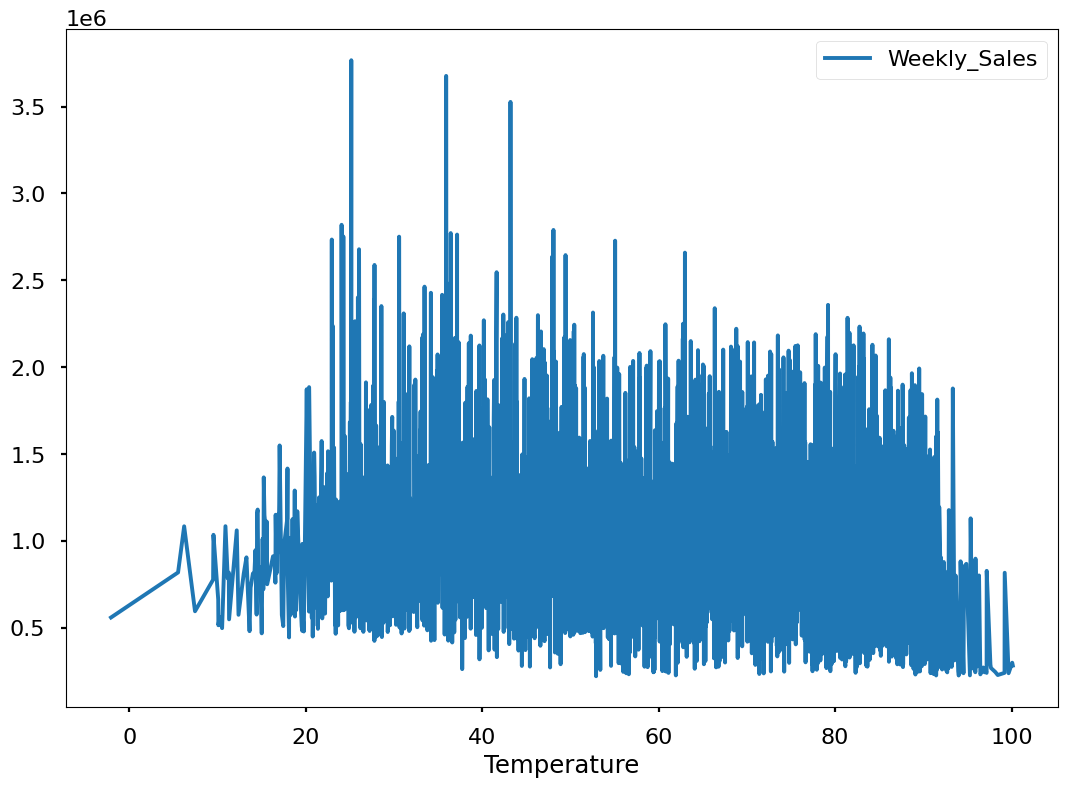

In [ ]:
temp = pd.pivot_table(w_df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<Axes: xlabel='CPI'>

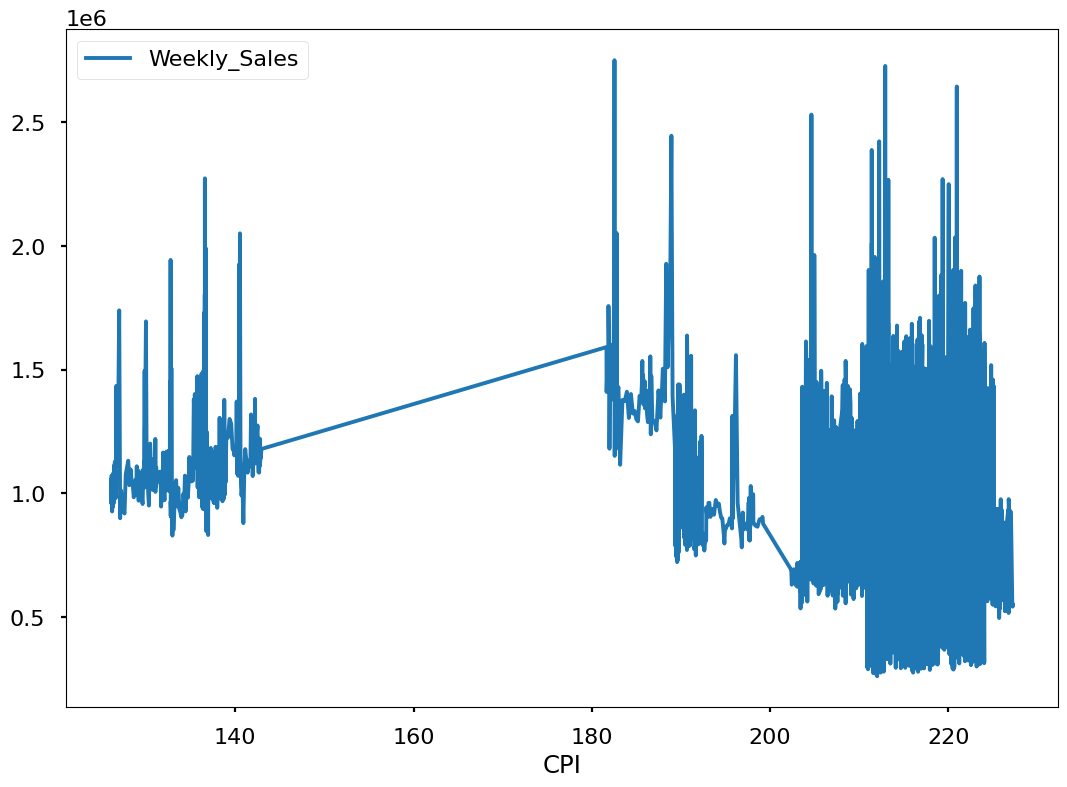

In [ ]:
CPI = pd.pivot_table(w_df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<Axes: xlabel='Unemployment'>

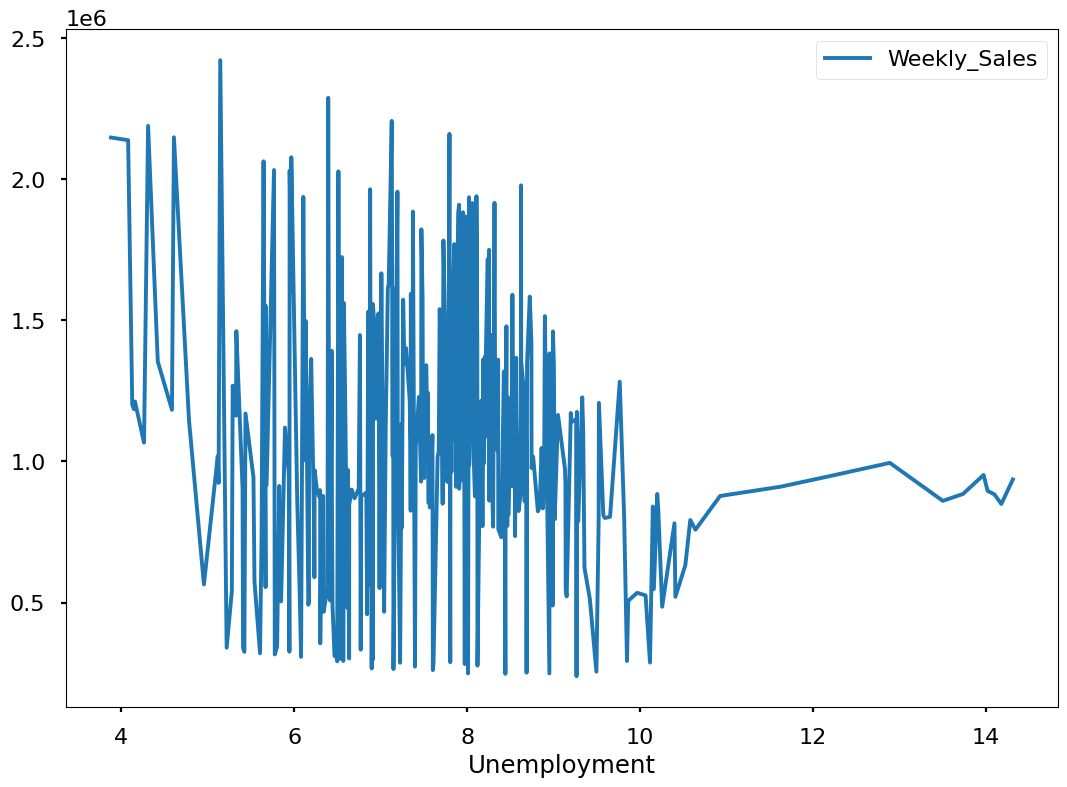

In [ ]:
unemployment = pd.pivot_table(w_df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

# Выводы

Данные не содержат пропущенных значений. Все столбцы были проверены.

* В данных 45 магазинов.
* 5 магазинов имеющих самые высокие продажи практически равны между собой
* Средние продажи в праздничные дни выше, чем в обычные дни.
* Подарки к Рождеству покупаются на 51-й неделе
** В 2010 году продажи к Рождеству были выше, чем в 2011 и 2012 (неизвестно) годах. Однако в данных за 2012 год отсутствуют продажи в ноябре и декабре. Даже без учета месяцев с самыми высокими продажами, 2012 год не значительно уступает 2010 году, поэтому после добавления двух последних месяцев он может занять первое место.
* В осенние праздники покупок меньше чем в любое другое время года
* Посреди лета небольшой всплеск
* Индекс потребительских цен, температура, уровень безработицы и цена на топливо не влияют на еженедельные продажи.